In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications import ResNet101

In [ ]:
num_classes = 5
image_size = 224

In [ ]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input,)

In [ ]:
trainDir = '/content/drive/MyDrive/dataset4/train'
train_set = data_generator.flow_from_directory(
    trainDir,
    target_size=(image_size, image_size),
    batch_size=5000,
    class_mode='categorical'
    )

Found 19050 images belonging to 5 classes.


In [ ]:
x_train, y_train = next(train_set)
len(x_train)

5000

In [ ]:
testDir = '/content/drive/MyDrive/dataset4/test'
test_set = data_generator.flow_from_directory(
    testDir,
    target_size=(image_size, image_size),
    batch_size=620,
    class_mode='categorical'
    )

Found 1574 images belonging to 5 classes.


In [ ]:
x_test, y_test = next(test_set)
len(x_test)

620

In [ ]:
from keras.models import Model
base_model= ResNet101(weights='imagenet',pooling ="max" , include_top=False, input_shape=(224, 224, 3))

171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
last_layer = base_model.get_layer('conv5_block3_out')
print(last_layer.output_shape)

(None, 7, 7, 2048)


In [ ]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [ ]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) 

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(x_train, y_train, batch_size=120, epochs=20, validation_split=0.3)
#include_top=False, pooling=max

Epoch 1/20
30/30 [==============================] - 1529s 51s/step - loss: 68.1902 - accuracy: 0.4706 - val_loss: 7.3296 - val_accuracy: 0.6853
Epoch 2/20
30/30 [==============================] - 1495s 50s/step - loss: 3.2284 - accuracy: 0.7429 - val_loss: 0.6641 - val_accuracy: 0.7933
Epoch 3/20
30/30 [==============================] - 1494s 50s/step - loss: 0.4961 - accuracy: 0.8254 - val_loss: 0.4658 - val_accuracy: 0.8247
Epoch 4/20
30/30 [==============================] - 1497s 50s/step - loss: 0.3357 - accuracy: 0.8700 - val_loss: 0.4018 - val_accuracy: 0.8487
Epoch 5/20
30/30 [==============================] - 1496s 50s/step - loss: 0.2681 - accuracy: 0.8943 - val_loss: 0.3823 - val_accuracy: 0.8527
Epoch 6/20
30/30 [==============================] - 1504s 51s/step - loss: 0.2382 - accuracy: 0.9103 - val_loss: 0.3531 - val_accuracy: 0.8713
Epoch 7/20
30/30 [==============================] - 1494s 50s/step - loss: 0.1920 - accuracy: 0.9297 - val_loss: 0.3560 - val_accuracy: 0.876

In [ ]:
res = model.evaluate(x_train, y_train)
print(f'정확도={res[1]*100:.1f}%')

157/157 [==============================] - 1493s 10s/step - loss: 0.1037 - accuracy: 0.9724
정확도=97.2%


In [ ]:
res = model.evaluate(x_test, y_test)
print(f'정확도={res[1]*100:.1f}%')

20/20 [==============================] - 187s 9s/step - loss: 0.8646 - accuracy: 0.8371
정확도=83.7%


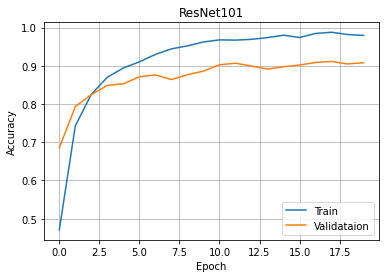

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('ResNet101')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

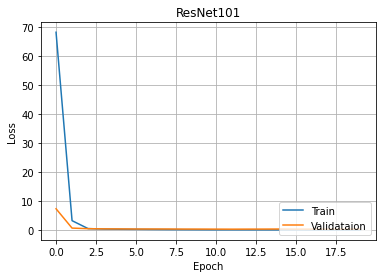

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('ResNet101')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
from tensorflow.python.keras.models import load_model
model.save('RN101_model.h5')

In [ ]:
load_model = tf.keras.models.load_model('RN101_model.h5')